In [2]:

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F

import utils
from models.generator import Generator

import numpy as np
import gc
import cv2
import matplotlib.pyplot as plt
import os
import time




device = 'cuda' if torch.cuda.is_available() else  'cpu'
print(device)


model_path = r'../ImagesCartoonify/checkpoints/trained_netG.pth'
generator = Generator().to(device)

generator.load_state_dict(torch.load(model_path,map_location=torch.device(device)))



preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)



print('Init WebCam...')
cap = cv2.VideoCapture(1)
size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

cpu
Init WebCam...


In [3]:
ret, frame_np = cap.read()
cap.release()

In [5]:
cv2.imshow('ads',frame_np)
cv2.waitKey()

113

In [6]:
# frame_np = cv2.cvtColor(frame_np, cv2.COLOR_BGR2RGB)
frame_np1 = cv2.resize(frame_np, (910, 512), cv2.INTER_AREA)
frame_np2 = frame_np1[:, 120:792, :]
frame_np3 = cv2.flip(frame_np2, 1)
tensor_img = preprocess(frame_np3).unsqueeze(0).to(device)
generator.eval()
with torch.no_grad():
    pred = generator(tensor_img)
generator.train()
# pred = inv_normalize(pred).squeeze(0).permute(1,2,0).cpu().numpy()
# pred = cv2.resize(pred,size,cv2.INTER_AREA)
# pred = cv2.cvtColor(pred,cv2.COLOR_BGR2RGB)

Generator(
  (down): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), bias=False)
    )
    (4): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
    )
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), bias=False)
    )
    (8): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
    )
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_runni

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat is not a numpy array, neither a scalar
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'


In [68]:
pred_np = inv_normalize(pred).squeeze().permute(1,2,0).numpy()
print(pred_np.shape)
b = (pred_np - np.min(pred_np))/np.ptp(pred_np)
print(b.min(),b.max(),pred_np.min(),pred_np.max())

(512, 672, 3)
0.0 1.0 0.15100001 0.714


In [69]:
cv2.imshow('pred',b)
cv2.waitKey()

113

In [72]:
cv2.imshow('pred',np.uint8(b*255))
cv2.waitKey()

113

In [73]:
b.shape

(512, 672, 3)

In [81]:
b_resize = cv2.resize(b,size)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', fourcc, 15, size)
pred_resized_color = cv2.cvtColor(b_resize,cv2.COLOR_BGR2RGB)
for i in range(10):
    out.write(np.uint8(b_resize*255))
out.release()


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [31]:
pred1 = inv_normalize(pred).squeeze().permute(1,2,0).numpy()
cv2.imshow('pred',pred1)
cv2.waitKey()
# pred = inv_normalize(pred).squeeze(0).permute(1,2,0).cpu().numpy()

113

In [33]:
pred_resized = cv2.resize(pred1,size,cv2.INTER_AREA)
cv2.imshow('pred',pred_resized)
cv2.waitKey()

113

In [39]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', fourcc, 15, size)
pred_resized_color = cv2.cvtColor(pred_resized,cv2.COLOR_BGR2RGB)
for i in range(10):
    out.write(np.uint8(pred_resized_color*255))
out.release()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [46]:
cv2.imshow('pred',np.uint8(pred_resized*255))
cv2.waitKey()

113

In [47]:
cv2.imshow('pred',np.uint8(cv2.cvtColor(pred_resized,cv2.COLOR_RGB2BGR)*255))
cv2.waitKey()

113

In [50]:
cv2.imshow('pred',pred_resized)
cv2.waitKey()

113

In [51]:
np.uint8(pred_resized*255).min(),np.uint8(pred_resized*255).max()

(0, 255)

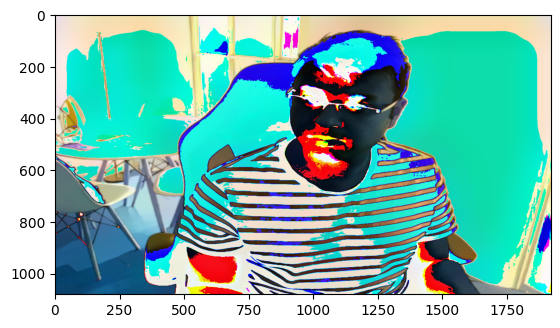

In [55]:
plt.imshow(np.uint8(pred_resized*255))

In [ ]:
# width = 1280 #int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
# height = 720 #int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)
# size = (width, height)

# fourcc = cv2.VideoWriter_fourcc(*'MP4V')
# out = cv2.VideoWriter('output.mp4', fourcc, 1, size)

# t_end = time.time() + 40

# print('Start cartoonifying...')
# while(time.time()<t_end):
    
#     ret, frame_np = cap.read()
#     print(ret)
#     frame_np = cv2.cvtColor(frame_np, cv2.COLOR_BGR2RGB)
    
#     frame_np = cv2.resize(frame_np, (910, 512), cv2.INTER_AREA)
#     frame_np = frame_np[:, 120:792, :]
#     frame_np = cv2.flip(frame_np, 1)
#     tensor_img = preprocess(frame_np).unsqueeze(0).to(device)
#     generator.eval()
#     with torch.no_grad():
#         pred = generator(tensor_img)
#     generator.train()
#     pred = inv_normalize(pred).squeeze(0).permute(1,2,0).cpu().numpy()
#     pred = cv2.resize(pred,size,cv2.INTER_AREA)
#     pred = cv2.cvtColor(pred,cv2.COLOR_BGR2RGB)
#     # pred = cv2.flip(pred,0)
#     out.write(np.uint8(pred*255))
#     cv2.imshow('Cartoonizer - WebCam [Press \'Q\' To Exit]', pred)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         gc.collect()
#         torch.cuda.empty_cache()
#         break
# cv2.destroyAllWindows()
# out.release()
# cap.release()
# print('Exit...')
